# Machine Learning and Neural Networks Final Coursework
# Generating a Digit Recognizer using Artificial Neural Network (ANN)
### Project done by Amelie Juliette Wibowo 

# Introduction
## Defining Problem

Image classification is a powerful tool that can help solve a wide range of problems in various fields. With the advancements in machine learning algorithms and the availability of vast amounts of data, image classification has become increasingly accurate and efficient. By training a computer model to recognize and categorize images, we can automate the process of identifying objects and patterns in images, which can contribute towards various industries.

For instance, image classification can be used to diagnose medical conditions, identify defects in manufacturing, or detect anomalies in surveillance footage. Additionally, image classification can help automate tedious and time-consuming tasks, freeing up humans to focus on more complex and strategic work. Ultimately, image classification can help us make better decisions, increase efficiency, and improve the accuracy and consistency of our analyses.

## Description of Dataset

The MNIST dataset is a commonly used dataset in deep learning for image classification tasks. The dataset is widely available for everyone (open-source) and can be accessed directly through the keras database or through the following link : http://yann.lecun.com/exdb/mnist/ . 

The dataset comprises of set of 70,000 images of handwritten digits, with 60,000 images used for training and 10,000 images used for testing. Each image is 28 pixels by 28 pixels, resulting in 784 total pixels. Each pixel is represented by a value between 0 and 255, where 0 represents a white pixel and 255 represents a black pixel. With this relatively small amount of data available within the dataset, the dataset's size can lead to overfitting.

In addition to the images themselves, the dataset also includes corresponding labels that identify which digit is present in each image. There are 10 possible labels, one for each digit from 0 to 9.

In terms of data quality in the MNIST dataset, the data is relatively simple and lacks the complexity of real-world images. This can make it difficult to generalize to more complex tasks, such as object recognition in natural scenes or medical image analysis. 




## Data usage
To utilize this data for deep learning, we will first need to preprocess it by normalizing the pixel values to be between 0 and 1, converting the labels to one-hot encoded vectors, and splitting the data into training and testing sets.We will then build an artificial neural network (ANN) using a deep learning framework such as TensorFlow or PyTorch. The ANN will have an input layer with 784 neurons, representing the 784 pixels in each image. This will be followed by one or more hidden layers, each containing a variable number of neurons. The final layer will have 10 neurons, representing the 10 possible output classes.

During training, the ANN will use backpropagation to adjust the weights and biases of the neurons in each layer in order to minimize the loss function. This will involve repeatedly feeding the training data through the network and comparing the predicted outputs to the actual labels.

Once the model has been trained, we can evaluate its performance on the testing set by calculating metrics such as accuracy, precision, recall, and F1 score. We can also use visualization techniques to better understand how the model is making predictions, such as by creating confusion matrices or plotting the activations of neurons in the hidden layers.

##Objectives
1. To demonstrate the capabilities of deep learning algorithms for image classification tasks.
2. To compare the performance of different deep learning models and architectures for image classification.
3. To benchmark new machine learning techniques and algorithms against a widely accepted dataset.
4. To provide a standardized dataset for testing and comparing image recognition models and algorithms.
5. To facilitate the development of new algorithms for preprocessing and feature extraction for image classification.
6. To support the development of new hardware or software solutions for image processing and classification.
7. To provide a useful tool for educational purposes and for teaching the principles of image classification and deep learning.
8. To provide a standardized dataset for cross-validation and model selection.
9. To investigate the impact of different hyperparameters, such as learning rate and number of layers, on model performance.
10. To explore the effects of different regularization techniques on model performance and to optimize models for real-world applications.

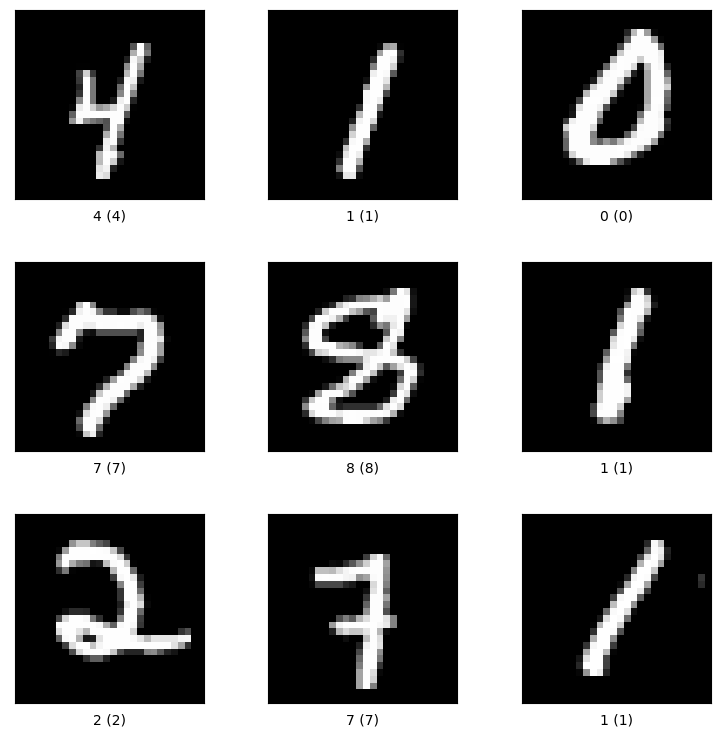

In [ ]:
import tensorflow_datasets as tfdata
dataset,ds_info = tfdata.load('mnist',split='train',with_info=True)
fig=tfdata.show_examples(dataset,ds_info)

In [ ]:
#Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist 
from tensorflow.keras import regularizers
from tensorflow.keras import models,layers 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,cohen_kappa_score,mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np 


from keras.models import Sequential
from keras.layers import Dense, Dropout

After importing the necessary libraries for the project, we import our dataset using the installed Tensorflow library. This provides us with the previously seperated train and test sets. Because we will need to train our models with training and validation sets, we will divide the dataset into training, validation, and test sets in a 3:1:1 ratio.

In [ ]:
# Initialize dataset size and ratios
DATASET_SIZE = 70000
TRAIN_RATIO = 0.6
VALIDATION_RATIO = 0.2
TEST_RATIO = 0.2

# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])

# Split the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_RATIO, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=VALIDATION_RATIO/(TRAIN_RATIO+VALIDATION_RATIO), stratify=y_train, random_state=42)

# Print the shapes of the datasets
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (42000, 28, 28) (42000,)
Validation set: (14000, 28, 28) (14000,)
Test set: (14000, 28, 28) (14000,)


##Baseline 1

We will generate our first baseline using the actual data format before preparing the data.

Below we will calculate the estimated probability of accurately predicting the label. This is obtained by acquiring the most frequently occurring label in the training data (by combining the validation and training data we separated above), and comparing it to the test data to predict the likelihood of an accurate guess.


In [ ]:
train_total=np.zeros(10)
test_total=np.zeros(10)
total_y_train=np.concatenate([y_train,y_val])

for i in range(len(total_y_train)):
  train_total[total_y_train[i]]+=1

for i in range(len(y_test)):
  test_total[y_test[i]]+=1

#Print Number of samples per label/class
print("Number of samples per label/class from 0 - 9 in training set:",train_total)
print("Number of samples per label/class from 0 - 9 in test set:",test_total)

#Get Most Frequest Label and Accuracy
x=np.argmax(train_total)
accurate=test_total[x]
accuracy_rate=accurate/np.sum(y_test)
print('Most frequent label:',x)
print('Percentage of accuracy rate of probability model:',(accuracy_rate*100))

Number of samples per label/class from 0 - 9 in training set: [5522. 6302. 5592. 5713. 5459. 5050. 5501. 5834. 5460. 5567.]
Number of samples per label/class from 0 - 9 in test set: [1381. 1575. 1398. 1428. 1365. 1263. 1375. 1459. 1365. 1391.]
Most frequent label: 1
Percentage of accuracy rate of probability model: 2.5267920169415388


##Prepare the Data
To prepare the data we will need to do 3 things :
1. **Reshaping the input feature arrays from 3D arrays to 2D arrays**. The original shape of each image in the MNIST dataset is (28, 28, 1), and this code reshapes it to a flattened 1D array of size 784.
2. **Normalizing the input features** by dividing them by 255. This rescales the pixel values from the original range of 0-255 to a normalized range of 0-1, which can improve model performance and training stability.
3. **Converting the target label arrays from a single integer to a one-hot encoded vector representation using the to_categorical() function**. This is necessary for training multi-class classification models, where each label represents a different class. The resulting one-hot encoded vector has a length equal to the number of classes, and the element corresponding to the true label is set to 1 while all other elements are set to 0.

In [ ]:
# Reshaping 3D arrays to 2D array
X_train = X_train.reshape(42000,28*28)
X_test = X_test.reshape(14000 ,28*28)
X_val = X_val.reshape(14000 ,28*28)

# Normalizing Input Features
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255
X_val=X_val.astype('float32')/255

# Use One-hot encoded vector to convert categorical function
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)


## Optimizer

We will use Adam as our optimizer for this project because it combines the best properties of AdaGrad, RMSprop, and momentum. "Momentum takes pastgradients into account to smooth out the steps of gradient descent,". ("Quick Notes on How to Select an Optimizer in Keras | DLology," 2018)

Furthermore, Adam outperforms other Adaptive techniques when it comes to training deep learning models. As for our project, I believe Adam would be appropriate because our dataset contains many images, similar to other projects that used Adam to solve optimization problems. Wirth (n.d.)

## Comparing Loss to Accuracy
There will be functions that perform the loss and accuracy plotting action, which will be used later in the project when building a model.

We would be using accuracy as our metrics at compilation which will be useful as we have thesame amount of samples per label/class (refer to Baseline 1 above). As accuracy is affected with the number of samples, it plays a big role towards it. However, previously we split the data into training, testing and validation sets which leads to an imbalance number of samples in each label / class. Hence, the accruacy would only represent the performance of the classifier at predicting results. 

To be able to identify wether the models are underfit/ overfit / good fit we will be using graphs to plot acccuracy and loss of the model.

In [ ]:
def plot_loss(loss,val_loss):
  '''plot training loss and validation loss on the graph'''
  plt.clf()#discard any existing features
  epochs=range(1,len(loss)+1)#get a number of epochs

  #assign values for each axis
  plt.plot(epochs,loss,'bo',label="Loss")
  plt.plot(epochs,val_loss,label="Validation Loss", color= "red")

  #set a title of graph and labels of each axis
  plt.title("Training Loss & Validation Loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

def plot_accuracy(acc,val_acc):
  '''plot training accuracy and validation accuracy'''
  plt.clf()#discard any existing features
  epochs=range(1,len(acc)+1) #get a number of epochs

  #assign labels and values for each axis
  plt.plot(epochs,acc,'ro',label="Accuracy")
  plt.plot(epochs,val_acc,label="Validation Accuracy" , color ="purple")

  #set a title of graph and labels of each axis
  plt.title("Training and validation accuracy")
  plt.xlabel('Epochs')
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

## Baseline 2
What would be the probability of predicting a class without using any model? 

From Baseline 1, we obtained that the accuracy is at 2.52%. In baseline 2, we will be exploring looking at the baseline without referring the dataset but by looking at labels/classes present in the set. Given there are 10 classes (0-9) for each handwritten number, then the probability of guessing label correctly will be at 10%. 

Given that this baseline yields a higher accuracy percentage, we will be utilizing this baseline for a better accuracy and better model. 

## Evaluation Method 1 : Hold-Out Method
The holdout method is one of the most widely used evaluation techniques for classifier models, and it is widely regarded as one of the best methods for assessing their performance. Here are some of the reasons:
- Provides an unbiased estimate of model performance: 
- Reduces possibility of over-fitting data
- Enables model selection and hyperparameter tuning
- Provides a simple and efficient evaluation method

### 1. Underfit Model
The first model would be fairly simple, meeting only the bare minimum of statistical power requirements. That is, to have an accuracy greater than 0.1 (better than baseline). 

The model will utilize the last activation layer : softmax and loss function: categorical_crossentropy. 


In [ ]:


# Define the model architecture
underfit_model = Sequential()
underfit_model.add(Dense(32, activation='relu', input_shape=(784,)))
underfit_model.add(Dense(10, activation='softmax'))

# Compile the model
underfit_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
underfit_results = underfit_model.fit(X_train, y_train, epochs=12, batch_size=120, validation_data=(X_val, y_val))

# Print Summary
underfit_model.summary()

Epoch 1/12
350/350 [==============================] - 1s 1ms/step - loss: 0.5270 - accuracy: 0.8616 - val_loss: 0.2921 - val_accuracy: 0.9197
Epoch 2/12
350/350 [==============================] - 0s 922us/step - loss: 0.2655 - accuracy: 0.9246 - val_loss: 0.2432 - val_accuracy: 0.9320
Epoch 3/12
350/350 [==============================] - 0s 931us/step - loss: 0.2256 - accuracy: 0.9350 - val_loss: 0.2163 - val_accuracy: 0.9384
Epoch 4/12
350/350 [==============================] - 0s 925us/step - loss: 0.1992 - accuracy: 0.9432 - val_loss: 0.1971 - val_accuracy: 0.9421
Epoch 5/12
350/350 [==============================] - 0s 919us/step - loss: 0.1791 - accuracy: 0.9485 - val_loss: 0.1827 - val_accuracy: 0.9459
Epoch 6/12
350/350 [==============================] - 0s 924us/step - loss: 0.1629 - accuracy: 0.9531 - val_loss: 0.1757 - val_accuracy: 0.9477
Epoch 7/12
350/350 [==============================] - 0s 911us/step - loss: 0.1499 - accuracy: 0.9570 - val_loss: 0.1691 - val_accuracy: 0

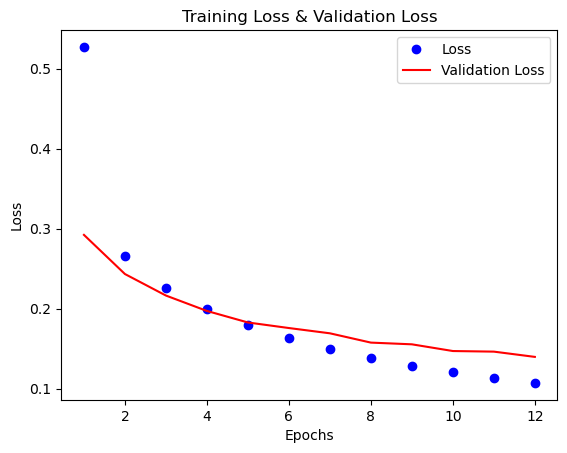

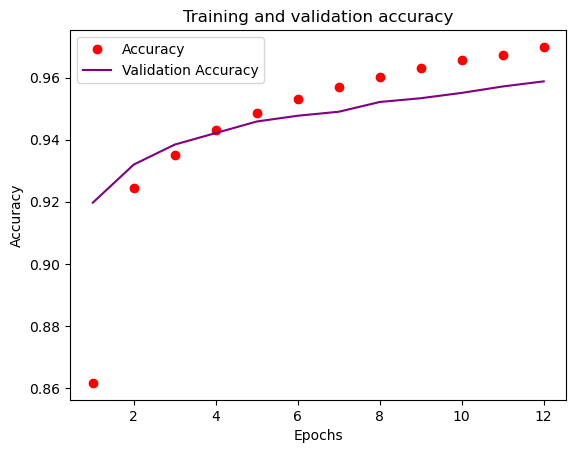

In [ ]:
#Plot Underfit Loss and Accuracy Results
plot_loss(underfit_results.history['loss'],underfit_results.history['val_loss'])
plot_accuracy(underfit_results.history['accuracy'],underfit_results.history['val_accuracy'])

In [ ]:
test_loss,test_acc =underfit_model.evaluate(X_val,y_val)

438/438 [==============================] - 0s 558us/step - loss: 0.1397 - accuracy: 0.9588


Despite the model is underfitted, the accuracy of the model reached 95%, which is sufficient as it is already better than the baseline which is at 10% only. For comparison, I will be creating an overfitting model.

### 2. Over-fit Model

After building a model that outperforms the baseline, we must create an overfitting model.Because the goal of this project is to develop a model that is somewhere between overfitting and underfitting, we must now cross that line to develop a model that overfits.

In this case, we would enlarge the model or increase the training until the model's performance on the validation data began to deteriorate. This is the point at which overfitting has occurred.

In [ ]:
# Define the model architecture
overfit_model = Sequential()
overfit_model.add(Dense(512, activation='relu', input_shape=(784,)))
overfit_model.add(Dense(256, activation='relu'))
overfit_model.add(Dense(128, activation='relu'))
overfit_model.add(Dense(10, activation='softmax'))

# Compile the model
overfit_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
overfit_results = overfit_model.fit(X_train, y_train, epochs=45, batch_size=64, validation_data=(X_val, y_val))

#Print Summary of model
overfit_model.summary()

Epoch 1/45
657/657 [==============================] - 4s 5ms/step - loss: 0.2373 - accuracy: 0.9297 - val_loss: 0.1123 - val_accuracy: 0.9659
Epoch 2/45
657/657 [==============================] - 3s 5ms/step - loss: 0.0935 - accuracy: 0.9701 - val_loss: 0.1266 - val_accuracy: 0.9616
Epoch 3/45
657/657 [==============================] - 3s 5ms/step - loss: 0.0597 - accuracy: 0.9811 - val_loss: 0.0994 - val_accuracy: 0.9715
Epoch 4/45
657/657 [==============================] - 3s 5ms/step - loss: 0.0440 - accuracy: 0.9861 - val_loss: 0.0837 - val_accuracy: 0.9761
Epoch 5/45
657/657 [==============================] - 3s 5ms/step - loss: 0.0344 - accuracy: 0.9886 - val_loss: 0.1134 - val_accuracy: 0.9721
Epoch 6/45
657/657 [==============================] - 3s 5ms/step - loss: 0.0297 - accuracy: 0.9899 - val_loss: 0.0987 - val_accuracy: 0.9752
Epoch 7/45
657/657 [==============================] - 3s 5ms/step - loss: 0.0252 - accuracy: 0.9920 - val_loss: 0.1040 - val_accuracy: 0.9766
Epoch 

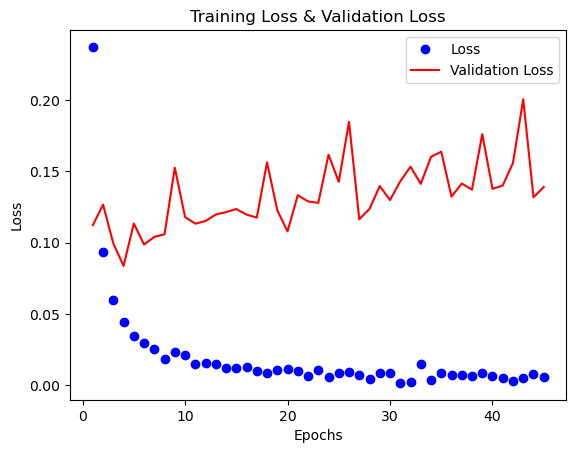

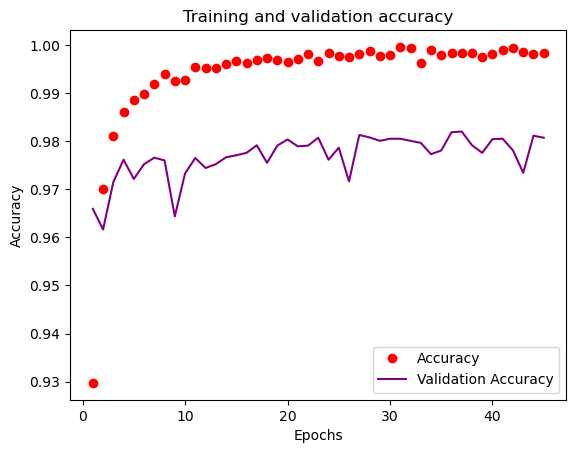

In [ ]:
#Plot Overfit Loss and Accuracy Results
plot_loss(overfit_results.history['loss'],overfit_results.history['val_loss'])
plot_accuracy(overfit_results.history['accuracy'],overfit_results.history['val_accuracy'])

In [ ]:
test_loss,test_acc =overfit_model.evaluate(X_val,y_val)

438/438 [==============================] - 0s 872us/step - loss: 0.1390 - accuracy: 0.9807


According to the evaluation, the overfit model has a higher accuracy at 97% when compared to the underfit model. However, the plotted graph depicts severe overfitting, as shown by the substantial difference in training and validation loss and accuracy.

## Regularization

After creating an overfitting model, we must modify it until the previously mentioned line is found. This can be accomplished through a variety of methods, which we will be investigating further in this project.

We will evaluate the network on the entire test set once the model has been initialized.

### Regularization Method 1. Drop-Out Layers
Dropout is a regularization technique used in deep learning to prevent the model from overfitting. It works by randomly removing (or setting to zero) some of a layer's output features during training. Dropout works on the principle that by removing some features, the network is forced to learn more robust and generalizable features that can be used to make accurate predictions on new data.


In [ ]:
# Define the model architecture
first_model = Sequential()
first_model.add(Dense(512, activation='relu', input_shape=(784,)))
first_model.add(Dropout(0.5))
first_model.add(Dense(256, activation='relu'))
first_model.add(Dropout(0.5))
first_model.add(Dense(128, activation='relu'))
first_model.add(Dropout(0.5))
first_model.add(Dense(10, activation='softmax'))

# Compile the model
first_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
first_model_result = first_model.fit(X_train, y_train, epochs=40, batch_size=128, validation_data=(X_val, y_val))

#Print Summary
first_model.summary()

Epoch 1/40
329/329 [==============================] - 2s 6ms/step - loss: 0.6470 - accuracy: 0.7942 - val_loss: 0.1990 - val_accuracy: 0.9426
Epoch 2/40
329/329 [==============================] - 2s 6ms/step - loss: 0.2590 - accuracy: 0.9283 - val_loss: 0.1440 - val_accuracy: 0.9598
Epoch 3/40
329/329 [==============================] - 2s 6ms/step - loss: 0.2037 - accuracy: 0.9424 - val_loss: 0.1296 - val_accuracy: 0.9641
Epoch 4/40
329/329 [==============================] - 2s 6ms/step - loss: 0.1692 - accuracy: 0.9533 - val_loss: 0.1109 - val_accuracy: 0.9690
Epoch 5/40
329/329 [==============================] - 2s 6ms/step - loss: 0.1474 - accuracy: 0.9589 - val_loss: 0.1009 - val_accuracy: 0.9719
Epoch 6/40
329/329 [==============================] - 2s 6ms/step - loss: 0.1302 - accuracy: 0.9636 - val_loss: 0.1077 - val_accuracy: 0.9721
Epoch 7/40
329/329 [==============================] - 2s 6ms/step - loss: 0.1193 - accuracy: 0.9661 - val_loss: 0.0954 - val_accuracy: 0.9738
Epoch 

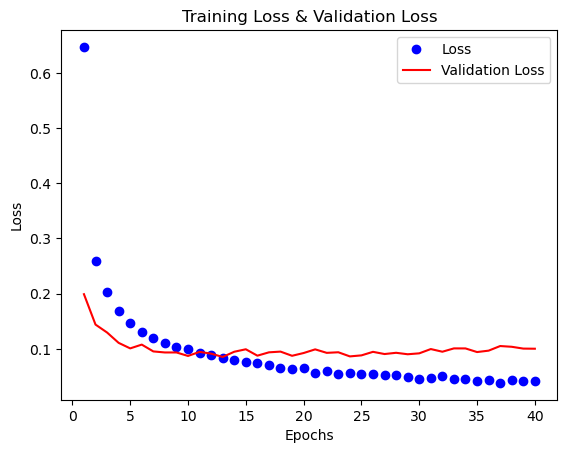

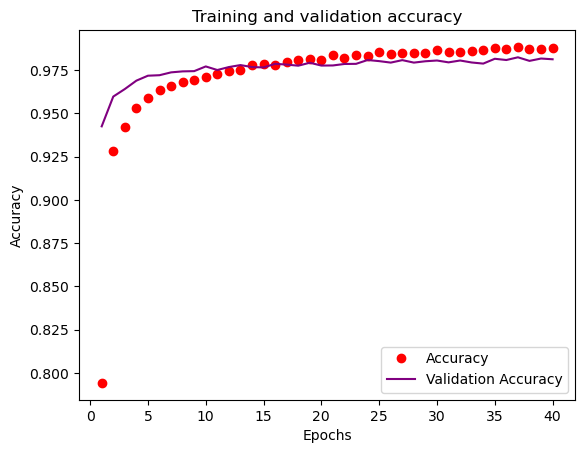

In [ ]:
#Plot Drop Out Regularized Loss and Accuracy Results
plot_loss(first_model_result.history['loss'],first_model_result.history['val_loss'])
plot_accuracy(first_model_result.history['accuracy'],first_model_result.history['val_accuracy'])

In [ ]:
test_loss,test_acc =first_model.evaluate(X_val,y_val)

438/438 [==============================] - 0s 904us/step - loss: 0.1003 - accuracy: 0.9814



### Regularization Method 2. L1 and/or L2 Regularization
L1 and L2 regularization are techniques used to prevent overfitting in machine learning models by adding a penalty term to the loss function. L1 regularization is useful for high-dimensional data, as it reduces the complexity of the model and improves its generalization performance. Ridge regularization, also known as Lipid, adds a penalty terms proportional to the square of the coefficients (weights) of themodel, resulting in all the coefficients being shrunk towards zero but none of them exactly zero. This technique is useful when the model has many small coefficients that are not necessarily zero, but are still contributing to overfitting, as well as improve the numerical stability of the optimization algorithm used to train the model.

In [ ]:
# Define the model architecture
second_model = Sequential()
second_model.add(Dense(512, activation='relu', input_shape=(28*28,)))
second_model.add(Dense(127,kernel_regularizer=regularizers.l1(0.01), activation='relu'))
second_model.add(Dense(45,kernel_regularizer=regularizers.l2(0.01), activation='relu'))
second_model.add(Dense(10, activation='softmax'))

# Compile the model
second_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
second_model_result = second_model.fit(X_train, y_train, epochs=40, batch_size=128, validation_data=(X_val, y_val))

#Print Summary
second_model.summary()

Epoch 1/40
329/329 [==============================] - 2s 5ms/step - loss: 4.7207 - accuracy: 0.8519 - val_loss: 0.9955 - val_accuracy: 0.8683
Epoch 2/40
329/329 [==============================] - 2s 5ms/step - loss: 0.7803 - accuracy: 0.9054 - val_loss: 0.6791 - val_accuracy: 0.9146
Epoch 3/40
329/329 [==============================] - 2s 5ms/step - loss: 0.6065 - accuracy: 0.9226 - val_loss: 0.5706 - val_accuracy: 0.9265
Epoch 4/40
329/329 [==============================] - 2s 5ms/step - loss: 0.5202 - accuracy: 0.9327 - val_loss: 0.4920 - val_accuracy: 0.9365
Epoch 5/40
329/329 [==============================] - 2s 5ms/step - loss: 0.4678 - accuracy: 0.9389 - val_loss: 0.4518 - val_accuracy: 0.9396
Epoch 6/40
329/329 [==============================] - 2s 5ms/step - loss: 0.4320 - accuracy: 0.9433 - val_loss: 0.4266 - val_accuracy: 0.9441
Epoch 7/40
329/329 [==============================] - 2s 5ms/step - loss: 0.4106 - accuracy: 0.9470 - val_loss: 0.4123 - val_accuracy: 0.9443
Epoch 

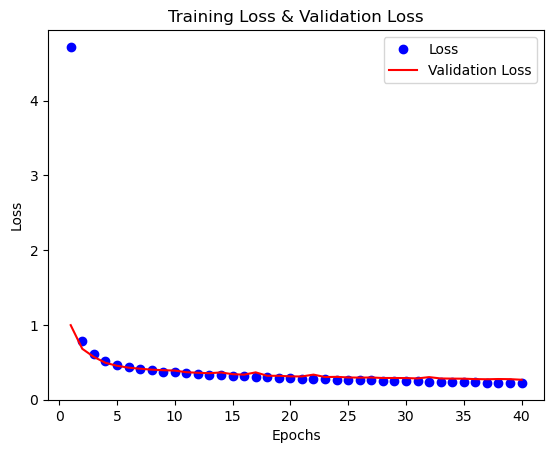

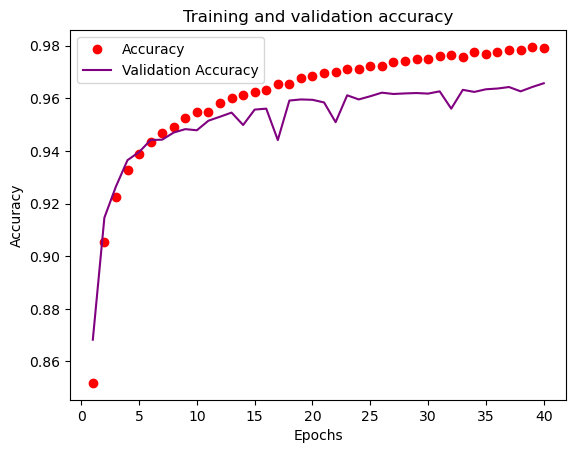

In [ ]:
#Plot L1 and L2 Regularized Loss and Accuracy Results
plot_loss(second_model_result.history['loss'],second_model_result.history['val_loss'])
plot_accuracy(second_model_result.history['accuracy'],second_model_result.history['val_accuracy'])

In [ ]:
test_loss,test_acc =second_model.evaluate(X_val,y_val)

438/438 [==============================] - 0s 863us/step - loss: 0.2646 - accuracy: 0.9657


## Combining both regularizations method

In [ ]:
# Define the model architecture
combined_model = Sequential()
combined_model.add(Dense(512, activation='relu', input_shape=(28*28,)))
combined_model.add(layers.Dropout(0.8))
combined_model.add(Dense(127,kernel_regularizer=regularizers.l1(0.01), activation='relu'))
combined_model.add(Dense(512, activation='relu'))
combined_model.add(Dense(10, activation='softmax'))

# Compile the model
combined_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
combined_model_result = combined_model.fit(X_train, y_train, epochs=40, batch_size=128, validation_data=(X_val, y_val))

#Print Summary
combined_model.summary()

Epoch 1/40
329/329 [==============================] - 2s 6ms/step - loss: 4.7000 - accuracy: 0.7560 - val_loss: 0.9002 - val_accuracy: 0.9025
Epoch 2/40
329/329 [==============================] - 2s 6ms/step - loss: 0.9216 - accuracy: 0.8688 - val_loss: 0.7085 - val_accuracy: 0.9239
Epoch 3/40
329/329 [==============================] - 2s 6ms/step - loss: 0.7666 - accuracy: 0.8917 - val_loss: 0.5934 - val_accuracy: 0.9370
Epoch 4/40
329/329 [==============================] - 2s 6ms/step - loss: 0.6961 - accuracy: 0.9014 - val_loss: 0.5675 - val_accuracy: 0.9434
Epoch 5/40
329/329 [==============================] - 2s 6ms/step - loss: 0.6558 - accuracy: 0.9081 - val_loss: 0.5227 - val_accuracy: 0.9474
Epoch 6/40
329/329 [==============================] - 2s 6ms/step - loss: 0.6190 - accuracy: 0.9150 - val_loss: 0.5445 - val_accuracy: 0.9484
Epoch 7/40
329/329 [==============================] - 2s 6ms/step - loss: 0.5982 - accuracy: 0.9185 - val_loss: 0.4887 - val_accuracy: 0.9496
Epoch 

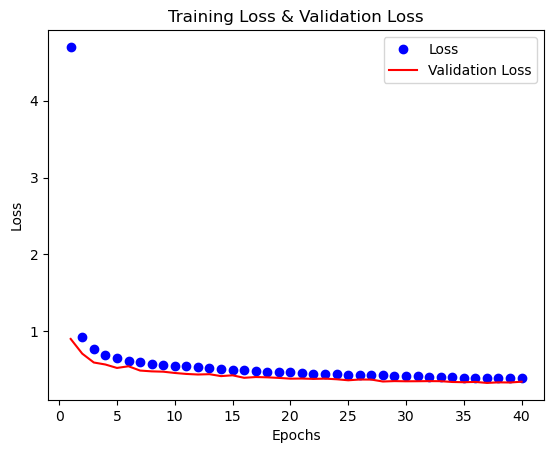

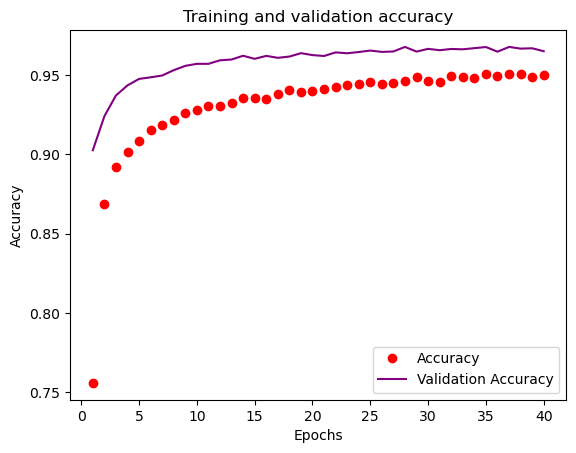

In [ ]:
#Plot Combined Loss and Accuracy Results
plot_loss(combined_model_result.history['loss'],combined_model_result.history['val_loss'])
plot_accuracy(combined_model_result.history['accuracy'],combined_model_result.history['val_accuracy'])

In [ ]:
test_loss,test_acc =combined_model.evaluate(X_val,y_val)

438/438 [==============================] - 0s 904us/step - loss: 0.3437 - accuracy: 0.9649


We obtained a model with a good fit from the plotted graphs, where the training and validation curves are close to one another without overfitting.

## Final Model
Now that we have built the final model, we will train on the entire training set rather than the partial training set. To do this , We would have to concatenate the training and validation images and labels below.

In [ ]:
# Define the model architecture
final_model = Sequential()
final_model.add(Dense(512, activation='relu', input_shape=(28*28,)))
final_model.add(layers.Dropout(0.8))
final_model.add(Dense(127,kernel_regularizer=regularizers.l1(0.01), activation='relu'))
final_model.add(Dense(512, activation='relu'))
final_model.add(Dense(10, activation='softmax'))

# Compile the model
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
final_model_result = final_model.fit(np.concatenate([X_train,X_val]),np.concatenate([y_train,y_val]), epochs=40, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/40
438/438 [==============================] - 3s 6ms/step - loss: 3.7796 - accuracy: 0.7797 - val_loss: 0.8160 - val_accuracy: 0.9063
Epoch 2/40
438/438 [==============================] - 2s 5ms/step - loss: 0.8477 - accuracy: 0.8773 - val_loss: 0.6624 - val_accuracy: 0.9305
Epoch 3/40
438/438 [==============================] - 2s 6ms/step - loss: 0.7210 - accuracy: 0.8982 - val_loss: 0.5661 - val_accuracy: 0.9453
Epoch 4/40
438/438 [==============================] - 2s 6ms/step - loss: 0.6597 - accuracy: 0.9096 - val_loss: 0.5364 - val_accuracy: 0.9479
Epoch 5/40
438/438 [==============================] - 2s 6ms/step - loss: 0.6193 - accuracy: 0.9164 - val_loss: 0.4755 - val_accuracy: 0.9569
Epoch 6/40
438/438 [==============================] - 2s 6ms/step - loss: 0.5832 - accuracy: 0.9210 - val_loss: 0.4506 - val_accuracy: 0.9598
Epoch 7/40
438/438 [==============================] - 2s 6ms/step - loss: 0.5625 - accuracy: 0.9242 - val_loss: 0.4590 - val_accuracy: 0.9626
Epoch 

We will be proving the usability of the final model by evaluating the model using several metrices :
1. "Evaluation on test data: which generates a list containing the combination of the loss andaccuracy.
2. Confusion matrix which is a breakdown of predictions into a table showing correct predictions and the types of incorrect predictions made, predictions in the diagonal section of the table are the correct predictions.
3. Precision which measures a classifier's exactness, higher precision means a more accurate classifier.
4. Recall which measures a classifier's completeness, higher recall mans more cases the classifier covers.
5. F1 Score is a weighted average of precision and recall.
6. Cohen’s kappa is the classification accuracy normalized by the imbalance of the classes inthe data. "(Willems, 2019)

In [ ]:
test_loss,test_acc =final_model.evaluate(X_val,y_val)

438/438 [==============================] - 0s 913us/step - loss: 0.2887 - accuracy: 0.9818


In [ ]:
y_pred=final_model.predict(X_test)
y_test=np.argmax(y_test,axis=1)
Y_pred=np.argmax(y_pred,axis=1)

#Calculate Metrices
conf_matrix =confusion_matrix(y_test,Y_pred)
prec =precision_score(y_test,Y_pred,average='micro')
rec =recall_score(y_test,Y_pred,average='micro')
f1=f1_score(y_test,Y_pred,average='micro')
coh_kappa=cohen_kappa_score(y_test,Y_pred)

#Print Results
print("Precision is:",prec)
print("Recall is:",rec)
print("F1 value is:",f1)
print("Cohen Kappa is:",coh_kappa)

438/438 [==============================] - 0s 782us/step
Precision is: 0.9712857142857143
Recall is: 0.9712857142857143
F1 value is: 0.9712857142857143
Cohen Kappa is: 0.9680847791661794


Text(95.72222222222221, 0.5, 'Truth Values')

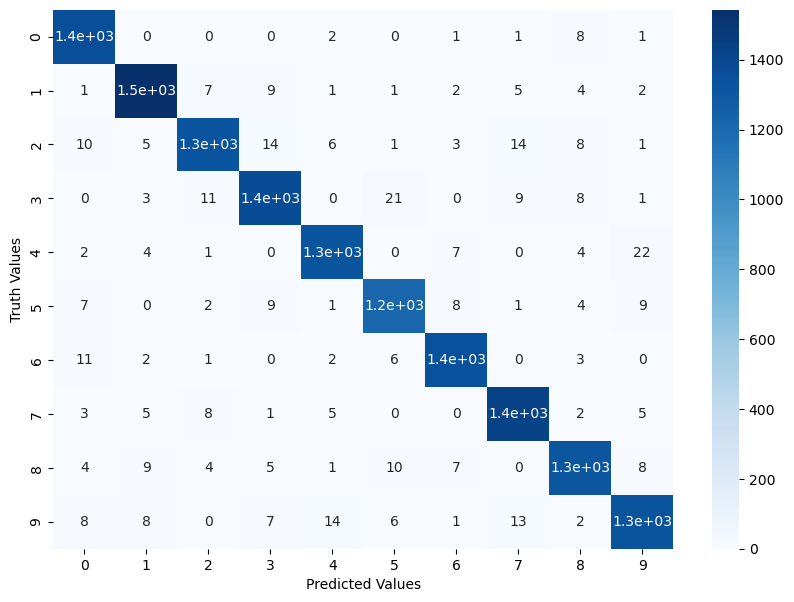

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(conf_matrix, annot=True,cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Truth Values')

In [ ]:
Y_pred[:5]

array([7, 3, 1, 1, 2], dtype=int64)

In [ ]:
y_test[:5]

array([7, 3, 1, 1, 2], dtype=int64)

## Analysis
Based on the evaluation metrics presented above, we can conclude that the model can perform well and generate moderately accurate results at 98.06%. This is supported further by generating the first five predicted values and comparing them to the first five values in the test data. Because both values generated are the same at "7, 3, 1, 1, 2," the model is confirmed as performing an accurate prediction using the trained model.

## Evaluation Method 2 : Iterated K-Fold
There are three common methods for selecting an evaluation protocol: hold-out, K-foldcross, and iterated K-fold. This method of evaluation, is highly dependent on the datapoints in the training and test sets, which in turn are dependent on the method of data splitting.

Since the dataset contains 70,000 sample data and we are running a deep learning project, the samples are insufficient. This means that our dataset is small, resulting in even smaller validation and partial training sets. A small validation set makes the validation scores more sensitive to the set's composition, affecting the datapoints on the split data.

According to the results of the evaluation, K-fold cross validation would be an ideal option when selecting an evaluation protocol because it decrease the responsiveness of validation towards a small set. However, for this project, we would attempt to create a highly accurate model. As a result, to meet the requirement of limited data and to perform a highly accurate model evaluation, we would employ iterated K-fold validation as our evaluation protocol. (2019, "How much data is required for machine learning?")

Note: Because the flow of both evaluation protocols is similar, repeated concepts will not be explained further except when comparing the two evaluation protocols or when necessary.

In [ ]:
# Initialize dataset size and ratios
DATASET_SIZE = 70000
TRAIN_RATIO = 0.8
TEST_RATIO = 0.2

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

# Split the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-TRAIN_RATIO, stratify=y, random_state=42)

We aren't required to split the training set at the start because we'll split it into partial training and validation sets in the iterated K-fold. This is because the training data will be divided into K equal-sized portions and trained on the remaining (K-1) partitions; this process will be repeated K times with different validation sets. Before splitting it into K-portions, K-fold is iterated multiple times and shuffled each time.

In [ ]:
print('final_train_img',X_train.shape)
print('final_train_labels',y_train.shape)
print('final_test_img',X_test.shape)
print('final_test_labels',y_test.shape)

final_train_img (56000, 28, 28)
final_train_labels (56000,)
final_test_img (14000, 28, 28)
final_test_labels (14000,)


In [ ]:
# Reshaping 3D arrays to 2D array
X_train = X_train.reshape(56000,28*28)
X_test = X_test.reshape(14000 ,28*28)

# Normalizing Input Features
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

# Use One-hot encoded vector to convert categorical function
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


The following functions will be used to plot the val mae graph.

In [ ]:
def smoother_curve(points,factor=0.9):
  smoothed_points=[]
  for point in points:
    if smoothed_points:
      previous=smoothed_points[-1]
      smoothed_points.append(previous*factor+point*(1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

In [ ]:
#Function to plot val mae graph
def plot_valmae(val_mae,num_epochs):
  '''plot val mae on the graph'''
  average=[np.mean([x[i]for x in val_mae])
  for i in range(num_epochs)]
  smooth_mae= smoother_curve(average)

  plt.plot(range(1,len(average)+1),average)
  plt.xlabel('Epochs')
  plt.ylabel('Validation MAE')
  plt.show()
  
  plt.plot(range(1,len(smooth_mae)+1),smooth_mae)
  plt.xlabel('epochs')
  plt.ylabel('Smooth Validation MAE')
  plt.show()
  
  print("Lowest MAE occurs at epoch",np.argmin(smooth_mae))

We are going to apply a mean squared error (MSE) for loss and a meanabsolute error (MAE) as our monitoring metric when performing iterated K-fold. However, because there is no concept of regression accuracy (MSE for regression loss), we usually monitor training using MAE. The graphs that are going to be plotted are only for MAE.

## Testing Iterated K-Fold on Under-fit Model
Let's test to see what happens when we use iterated K-fold on the same underfit model that performed better than the baseline (for hold-out validation).

In [ ]:
# Define the under-fit model architecture
underfit_model = Sequential()
underfit_model.add(Dense(32, activation='relu', input_shape=(784,)))
underfit_model.add(Dense(10, activation='softmax'))

# Compile the model
underfit_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['mae'])

In [ ]:
from sklearn.model_selection import StratifiedKFold

K = 4
num_val_samples = len(X_train) // K
num_epochs = 50
all_val_mae_u = []
all_val_mse_u = []

all_mae_u = []
all_loss_u = []
all_mae_hist_u =[]
all_loss_hist_u =[]

N_iterations = 4 
N_folds = 5

for i in range(N_iterations):
  skf = StratifiedKFold(n_splits=N_folds, shuffle=True)
  for j, (train_index, val_index) in enumerate(skf.split(X_train, y_train.argmax(axis=1))):
      print('processing fold', j)

      partial_train_data = X_train[train_index]
      val_data = X_train[val_index]

      partial_train_targets = y_train[train_index]
      val_targets = y_train[val_index]
      
      # Train the model (in silent mode, verbose=0)
      history = underfit_model.fit(partial_train_data, partial_train_targets,
                                   epochs=num_epochs, batch_size=128, verbose=0, 
                                   validation_data=(val_data, val_targets))
      
      # Evaluate the model on the validation data
      val_mse, val_mae = underfit_model.evaluate(val_data, val_targets, verbose=0)
      all_val_mae_u.append(val_mae)
      all_val_mse_u.append(val_mse)
      
      mae = history.history['mae']
      all_mae_u.append(mae)
      mae_history = history.history['val_mae']
      all_mae_hist_u.append(mae_history)
      
      loss = history.history['loss']
      all_loss_u.append(loss)
      loss_history = history.history['loss']
      all_loss_hist_u.append(loss_history)


processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 4
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 4
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 4
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 4


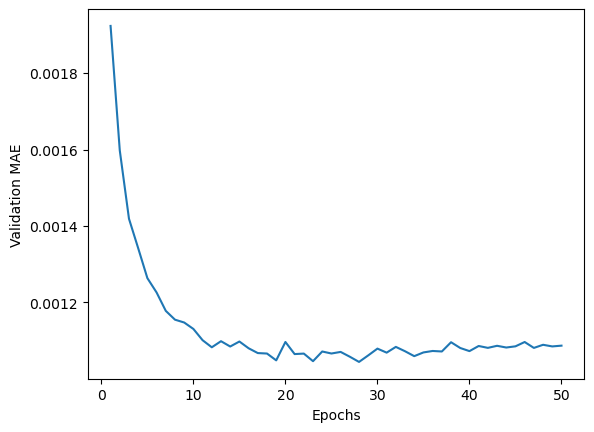

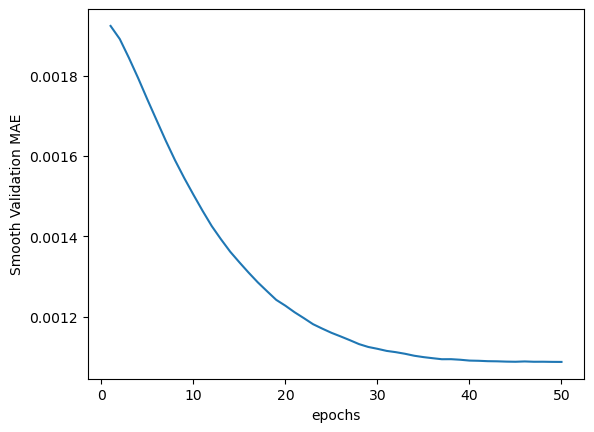

Lowest MAE occurs at epoch 49


In [ ]:
plot_valmae(all_mae_hist_u,num_epochs)

From the graphs above, we can tell that our under-fit model has sufficient layers, this can be seen as lowest MAE occurs at epoch 49 which is good enough. However, Let's test with other models to compare the results.

## Testing Iterated K-Fold on Over-fit Model
Next, let's see what will K-fold Iteration would result when performed on an over-fit model. 

In [ ]:
# Define the model architecture
overfit_model = Sequential()
overfit_model.add(Dense(512, activation='relu', input_shape=(784,)))
overfit_model.add(Dense(256, activation='relu'))
overfit_model.add(Dense(128, activation='relu'))
overfit_model.add(Dense(10, activation='softmax'))

# Compile the model
overfit_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['mae'])

In [ ]:
from sklearn.model_selection import StratifiedKFold

K = 4
num_val_samples = len(X_train) // K
num_epochs = 100
all_val_mae_o = []
all_val_mse_o = []


all_mae_o = []
all_loss_o = []
all_mae_hist_o =[]
all_loss_hist_o =[]

N_iterations = 4 
N_folds = 5

for i in range(N_iterations):
  skf = StratifiedKFold(n_splits=N_folds, shuffle=True)
  for j, (train_index, val_index) in enumerate(skf.split(X_train, y_train.argmax(axis=1))):
      print('processing fold', j)

      partial_train_data = X_train[train_index]
      val_data = X_train[val_index]

      partial_train_targets = y_train[train_index]
      val_targets = y_train[val_index]
      
      # Train the model (in silent mode, verbose=0)
      history = overfit_model.fit(partial_train_data, partial_train_targets,
                                   epochs=num_epochs, batch_size=128, verbose=0, 
                                   validation_data=(val_data, val_targets))
      
      # Evaluate the model on the validation data
      val_mse, val_mae = overfit_model.evaluate(val_data, val_targets, verbose=0)
      all_val_mae_o.append(val_mae)
      all_val_mse_o.append(val_mse)
      
      mae = history.history['mae']
      all_mae_o.append(mae)
      mae_history = history.history['val_mae']
      all_mae_hist_o.append(mae_history)
      
      loss = history.history['loss']
      all_loss_o.append(loss)
      loss_history = history.history['loss']
      all_loss_hist_o.append(loss_history)


processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 4
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 4
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 4
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 4


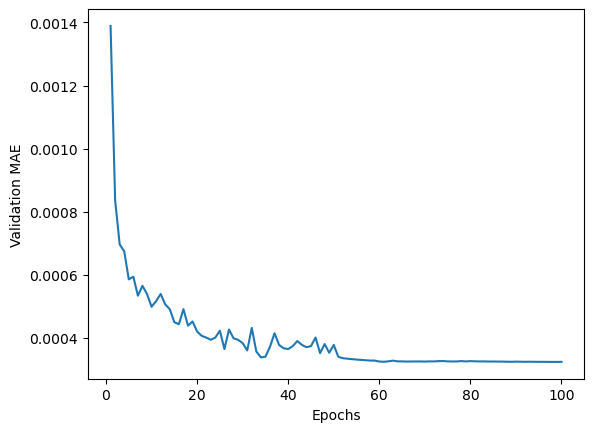

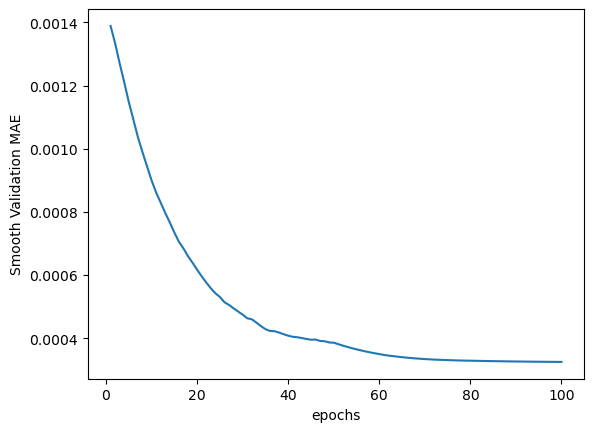

Lowest MAE occurs at epoch 99


In [ ]:
plot_valmae(all_mae_hist_o,num_epochs)

From the graph above, the lowest MAE occurs at epoch . This means that around 27 epochsis optimal. We can now train the model on the full training set and evaluate our model.

## Testing Iterated K-Fold on Good-Fit Model
Let's train our model on all the training set instead of the partial training sets.

In [ ]:
# Define the model architecture
combined_model = Sequential()
combined_model.add(Dense(512, activation='relu', input_shape=(28*28,)))
combined_model.add(Dense(127,kernel_regularizer=regularizers.l1(0.01), activation='relu'))
combined_model.add(Dense(512, activation='relu'))
combined_model.add(Dense(10, activation='softmax'))

# Compile the model
combined_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['mae'])

In [ ]:
from sklearn.model_selection import StratifiedKFold

K = 4
num_val_samples = len(X_train) // K
num_epochs = 25
all_val_mae_g = []
all_val_mse_g = []


all_mae_g = []
all_loss_g = []
all_mae_hist_g =[]
all_loss_hist_g =[]

N_iterations = 4 
N_folds = 5

for i in range(N_iterations):
  skf = StratifiedKFold(n_splits=N_folds, shuffle=True)
  for j, (train_index, val_index) in enumerate(skf.split(X_train, y_train.argmax(axis=1))):
      print('processing fold', j)

      partial_train_data = X_train[train_index]
      val_data = X_train[val_index]

      partial_train_targets = y_train[train_index]
      val_targets = y_train[val_index]
      
      # Train the model (in silent mode, verbose=0)
      history = overfit_model.fit((np.concatenate([partial_train_data,val_data])),(np.concatenate([partial_train_targets,val_targets])),
                                   epochs=num_epochs, batch_size=128, verbose=0, 
                                   validation_data=(val_data, val_targets))

processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 4
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 4
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 4
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 4


In [ ]:
test_loss,test_acc=combined_model.evaluate(X_test,y_test)

438/438 [==============================] - 1s 1ms/step - loss: 33.8519 - mae: 0.1799


## Analysis
Based on the evaluation above, we can draw the conclusion that the model is able to generate moderately accurate results, as evidenced by the prediction error on unseen data of **0.1799 x 100 = 1.79%**. Given the low prediction error score, we can conclude that the model is able to run well and generate moderately accurate results.

## Conclusion
I was able to train two distinct models, both of which performed admirably overall. Both models were developed using different evaluation protocols but common network layers. Hold-out validation necessitated regularizing the model with drop out and regularisers, whereas iterated k-fold validation necessitated fewer eopchs. Otherwise, the model's general layout would appear to be as follows:

 - combined_model.add(Dense(512, activation='relu', input_shape=(28*28,)))
 - combined_model.add(Dense(127,kernel_regularizer=regularizers.l1(0.01), activation='relu'))
 - combined_model.add(Dense(512, activation='relu'))
  -combined_model.add(Dense(10, activation='softmax'))

The metric varies depending on the evaluation protocol when using Adam as the optimizer and categorical crossentropy as the loss function (accuracy vs mae).

Tuning of hyperparameters was performed during the process of building and training the models to find the optimal configuration but was not explicitly explained or elaborated on. This is due to the fact that tuning hyperparameters required running and generating an excessive number of cells. This, however, does not diminish the significance of hyperparameters.

In conclusion, while the evaluation protocols used may differ, the general outline of the models, as shown above, is similar. Although this may be influenced by data splitting when using hold-out validation, and there may be a better model for iterated k-fold validation. The models are capable of producing overall excellent results regardless of their evaluation protocols.

I was able to create two distinct models using two distinct evaluation protocols, with both models having a similar outline. 
- Hold-out validation with 95.88% accuracy whilst the iterated k-fold validation with 1.79% prediction error. It tells us that, while both models has the potential to perform well
- the iterated k-fold model outperforms the hold-out model because hold-out validation have a prediction error of 100 - 95.88 = 4.12%, which is significantly higher than iterated k-fold.

## References
- Wirth, P. Which Optimizer should I use for my ML Project?. Lightly.ai. Retrieved 2 March 2023, from https://www.lightly.ai/post/which-optimizer-should-i-use-for-my-machine-learning-project.Quick

- K-Fold | K-fold Averaging on Deep Learning Classifier. Analytics Vidhya.Retrieved 9 March 2023, from https://www.analyticsvidhya.com/blog/2021/09/how-to-apply-k-fold-averaging-on-deep-learning-classifier/.


 - Notes on How to choose Optimizer In Keras | DLology. Dlology.com. (2018). Retrieved 8 March 2023 2023, from https://www.dlology.com/blog/quick-notes-on-how-to-choose-optimizer-in-keras/#disqus_thread.
 
- How much data is required for machine learning?. Quora. (2019). Retrieved 9 March 2023,from https://www.quora.com/How-much-data-is-required-for-machine-learning.Kolassa, S. 


- Willems, K. (2019). DataCamp. Retrieved 10 March 2023, fromhttps://www.datacamp.com/community/tutorials/deep-learning-python.Rastogi, S. (2021). 

